In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Import dataset containing grayscale digits
- How are digits represented in the dataset?
  - SOLUTION: - 64 dimensional vectors of integers from 0 (white) to 16 (black)

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()
digits = dataset.data
target = dataset.target

### Visualize a digit

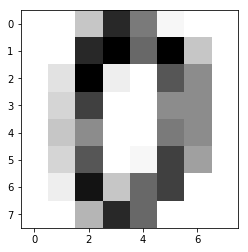

In [3]:
plt.imshow(digits[0].reshape(8,8),cmap='Greys')

## PCA Impementation

### 1. Compute covariation matrix

In [4]:
cov_mat = np.cov(digits,rowvar=False)
print digits
print cov_mat

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.8229975   2.40099498 ... -0.1598953   0.09851423
  -0.07406182]
 [ 0.          2.40099498 22.60837352 ... -1.15544033  1.41203571
   0.72988047]
 ...
 [ 0.         -0.1598953  -1.15544033 ... 34.81734839 15.64854441
   2.87558266]
 [ 0.          0.09851423  1.41203571 ... 15.64854441 16.73258202
   4.72078588]
 [ 0.         -0.07406182  0.72988047 ...  2.87558266  4.72078588
   3.46005282]]


### 2. Compute eigenvalues and eigenvectors
If we use `np.linalg.eig`, no sorting is needed as the returned output is already sorted.

The eigenvectors are the columns of eig_vecs matrix.

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 3. Project digits to first two principal components
(don't forget to do the mean normalization of the digits before transforming)

In [6]:
W = eig_vecs[:,:2]
mean_vector = digits.mean(0)
normalized_digits = digits - mean_vector
projected_digits = np.matmul(normalized_digits,W)

### 4. Explained variance
1. If we want to keep 90 % variance, how many principal components do we keep?
2. Plot the explained variance based on number of components
  - x-axis = number of principal components
  - y-axis = how much variance do first `x` components explain

21


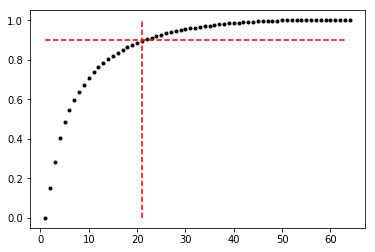

In [31]:
x_data = np.arange(1,eig_vals.size+1)

def sum_eig_vals(x): 
  for n in range(x):
    yield sum(eig_vals[:n])


y_data = np.fromiter(sum_eig_vals(eig_vals.size), dtype=float, count=64)
ninety = np.argmax(y_data>0.9)
print ninety
plt.plot(x_data,y_data,'k.')
plt.plot((21,21),(0,1),'r--')
plt.plot((1,63),(0.9,0.9),'r--')

### 5. Plotting digit classes based on first two principal components
- Which class is easy and which class is hard to distinguish from others?
- Which two classes overlap a lot?

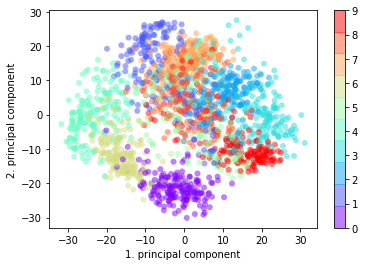

In [8]:
plt.scatter(projected_digits[:, 0], projected_digits[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('1. principal component')
plt.ylabel('2. principal component')
plt.colorbar();